In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from joblib import load
import json
from dataset_loader import TidySequentialDataCSVLoader
import torch

In [2]:
%matplotlib inline

# Simulated Data

## 2 state

In [ ]:
model_folder = '/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn/simulated_data_results'
for arch in ['032', '128']:
    fig, axs = plt.subplots(9,2)
    #     gs1 = gridspec.GridSpec(8,2)
    # gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
    fig.set_size_inches(8.5, 16)
    fig.dpi = 300
    lw=0.5

    for idx,lr in enumerate([0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10]):
        rnn_model_file = (model_folder+'/2-state-rnn-simulated-data-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_rnn_classifer.pkl')
        aucroc_plots_file = (model_folder+'/2-state-rnn-simulated-data-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_roc_curve.png')
        rnn_model = load(rnn_model_file)
        epochs = rnn_model.history[:,'epoch']
        train_loss = rnn_model.history[:,'train_loss']
        valid_loss = rnn_model.history[:,'valid_loss']
        aucroc_score_train = rnn_model.history[:,'aucroc_score_train']
        aucroc_score_valid = rnn_model.history[:,'aucroc_score_valid']
        img_aucroc = mpimg.imread(aucroc_plots_file)
        # plot train aand validation loss
        axs[idx,0].plot(epochs, train_loss, 'r-.', label = 'Train Loss', linewidth=lw)
        axs[idx,0].plot(epochs, valid_loss, 'b-.', label = 'Validation Loss', linewidth=lw)

        # customize y ticks
        axs[idx,0].set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 0.93, 0.96, 1]) 
        axs[idx,0].set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.9, 0.93, 0.96, 1], fontsize=4)
        axs[idx,0].plot(epochs, aucroc_score_train, 'g-.', label = 'AUCROC Score(Train)', linewidth=lw)
        axs[idx,0].plot(epochs, aucroc_score_valid, 'm-.', label = 'AUCROC Score(Validation)', linewidth=lw)
        axs[idx,0].set_xlabel('Epochs')
        axs[idx,0].set_ylabel('Loss')
        axs[idx,0].legend(fontsize=6)
        axs[idx,0].set_title('Training Performance (learning rate : %s, hidden units : %s)'%(str(lr), arch))
        axs[idx,1].imshow(img_aucroc, aspect='auto')
        axs[idx,1].axis('off')
    fig.suptitle('2 State Performance plots for NN with '+arch+' hidden units')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#     fig.savefig('2-state-rnn-arch-'+arch+'-performance-plots.png')
    plt.show()

## 3 state

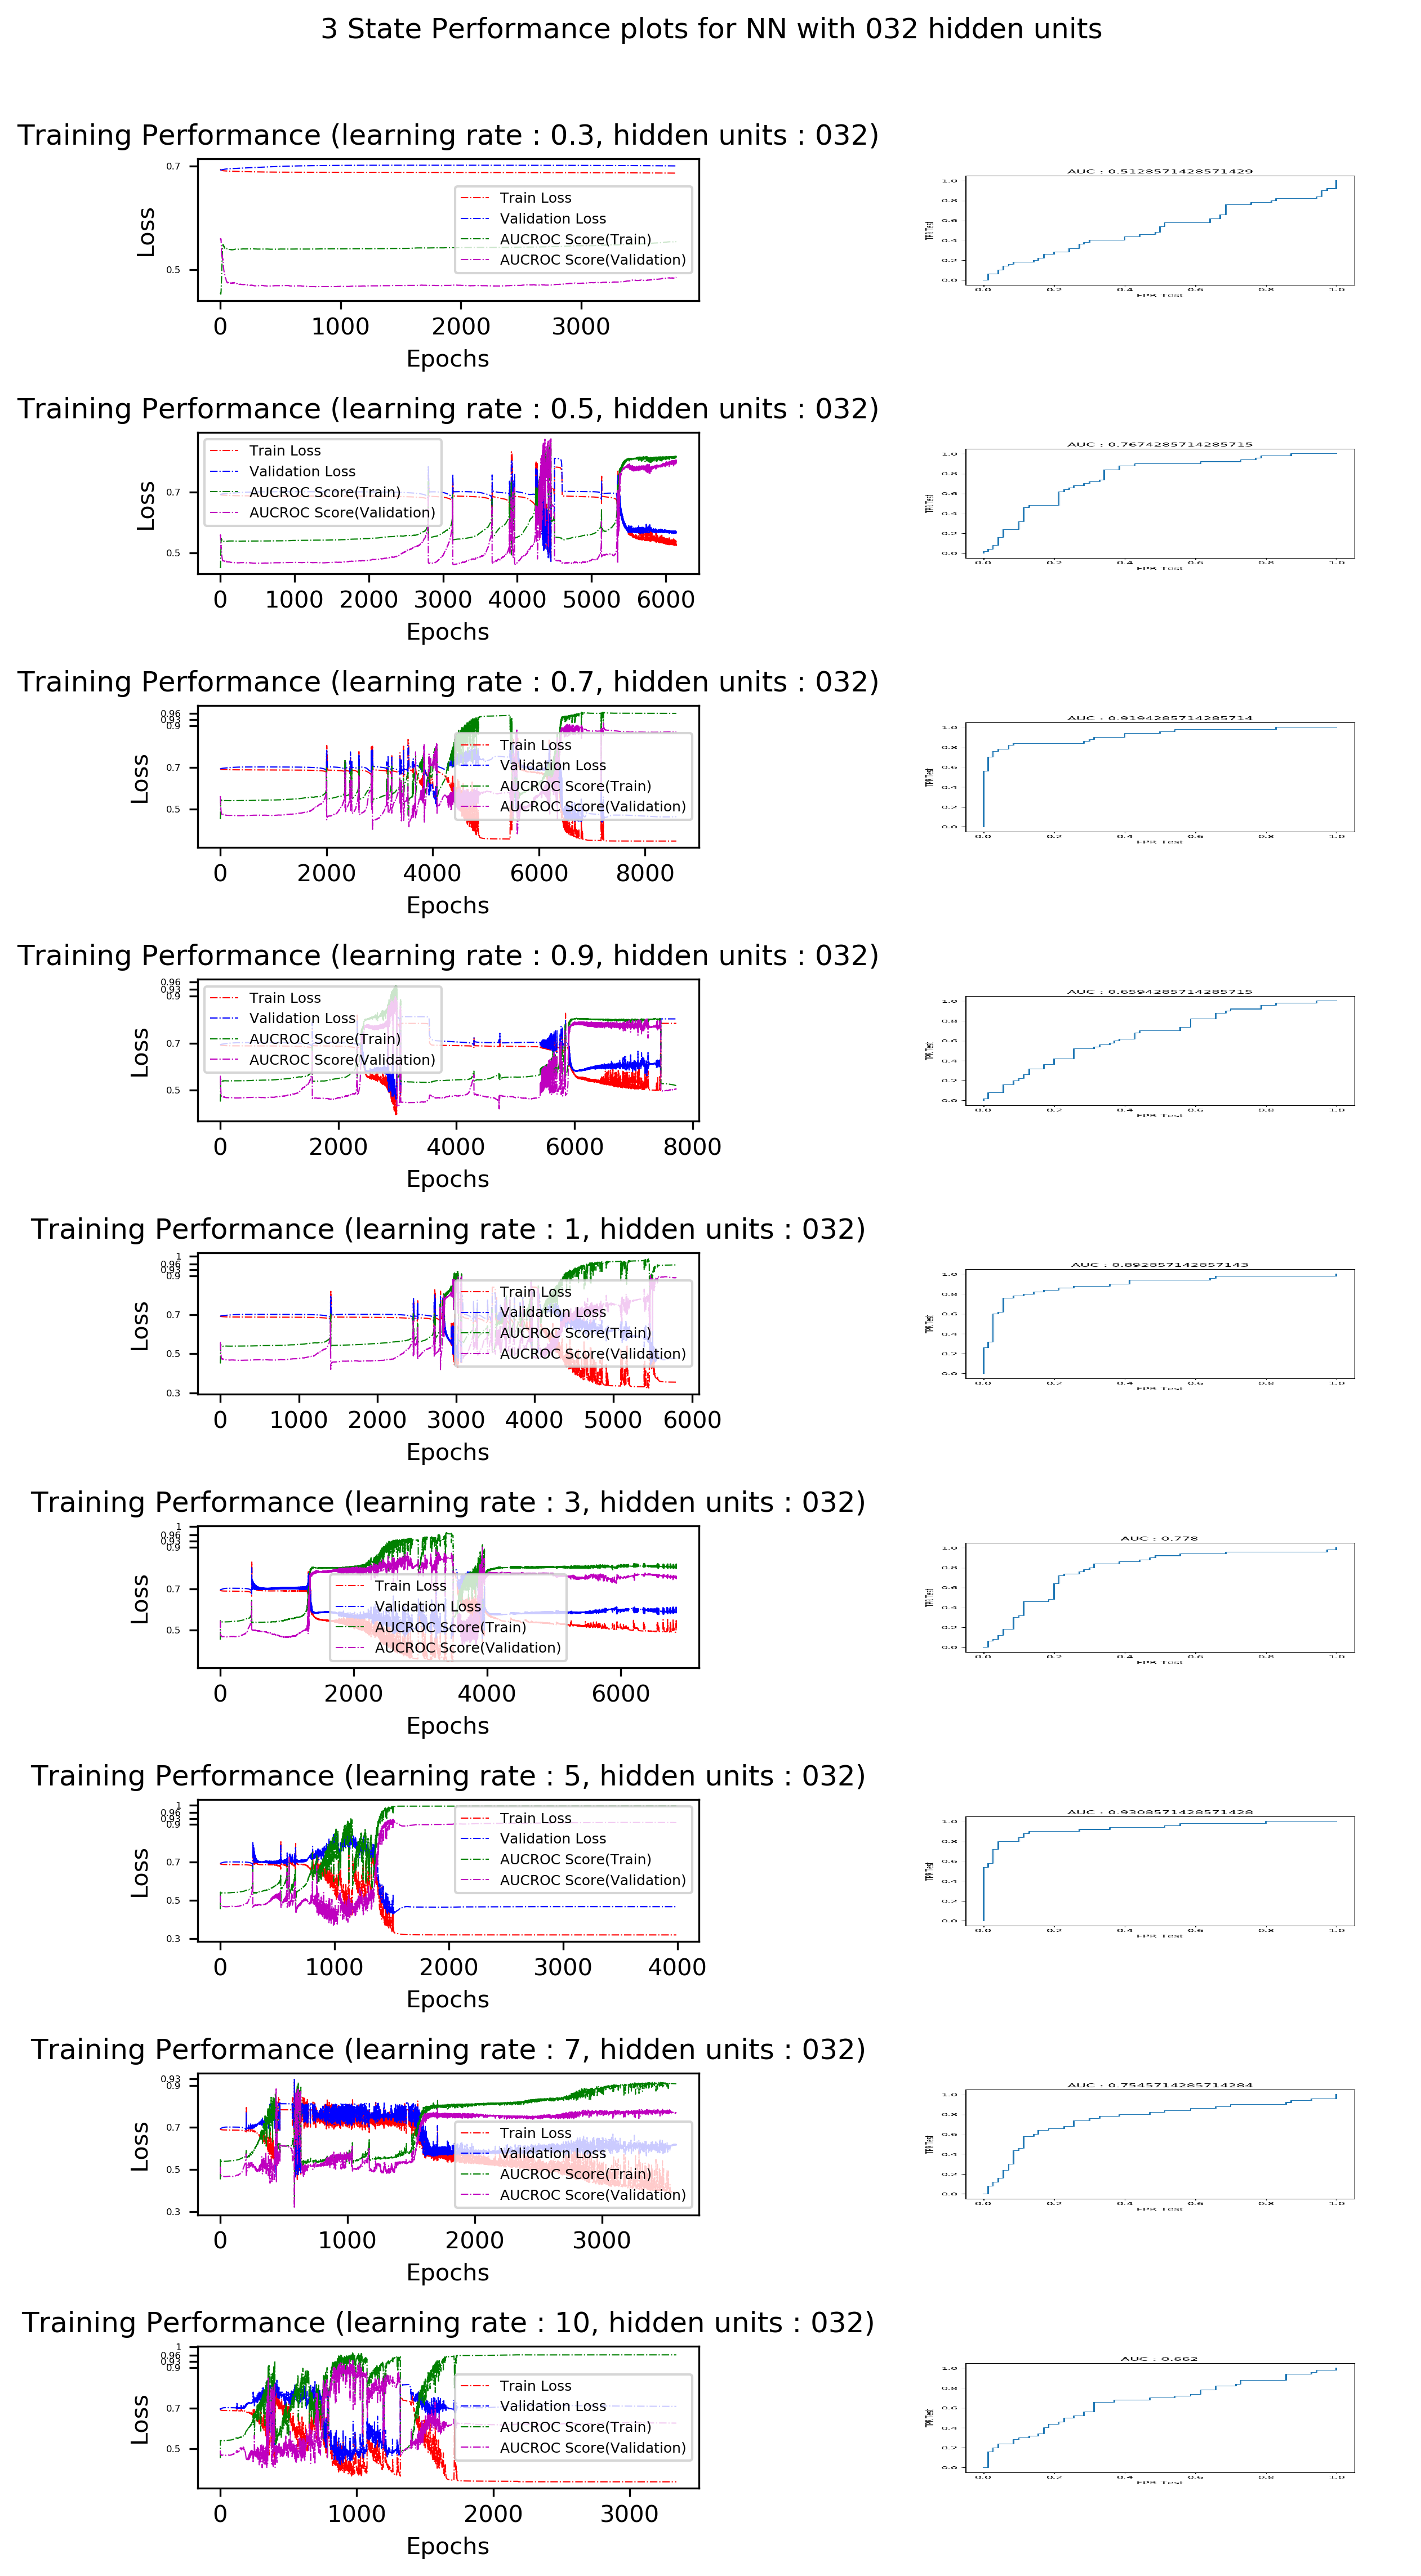

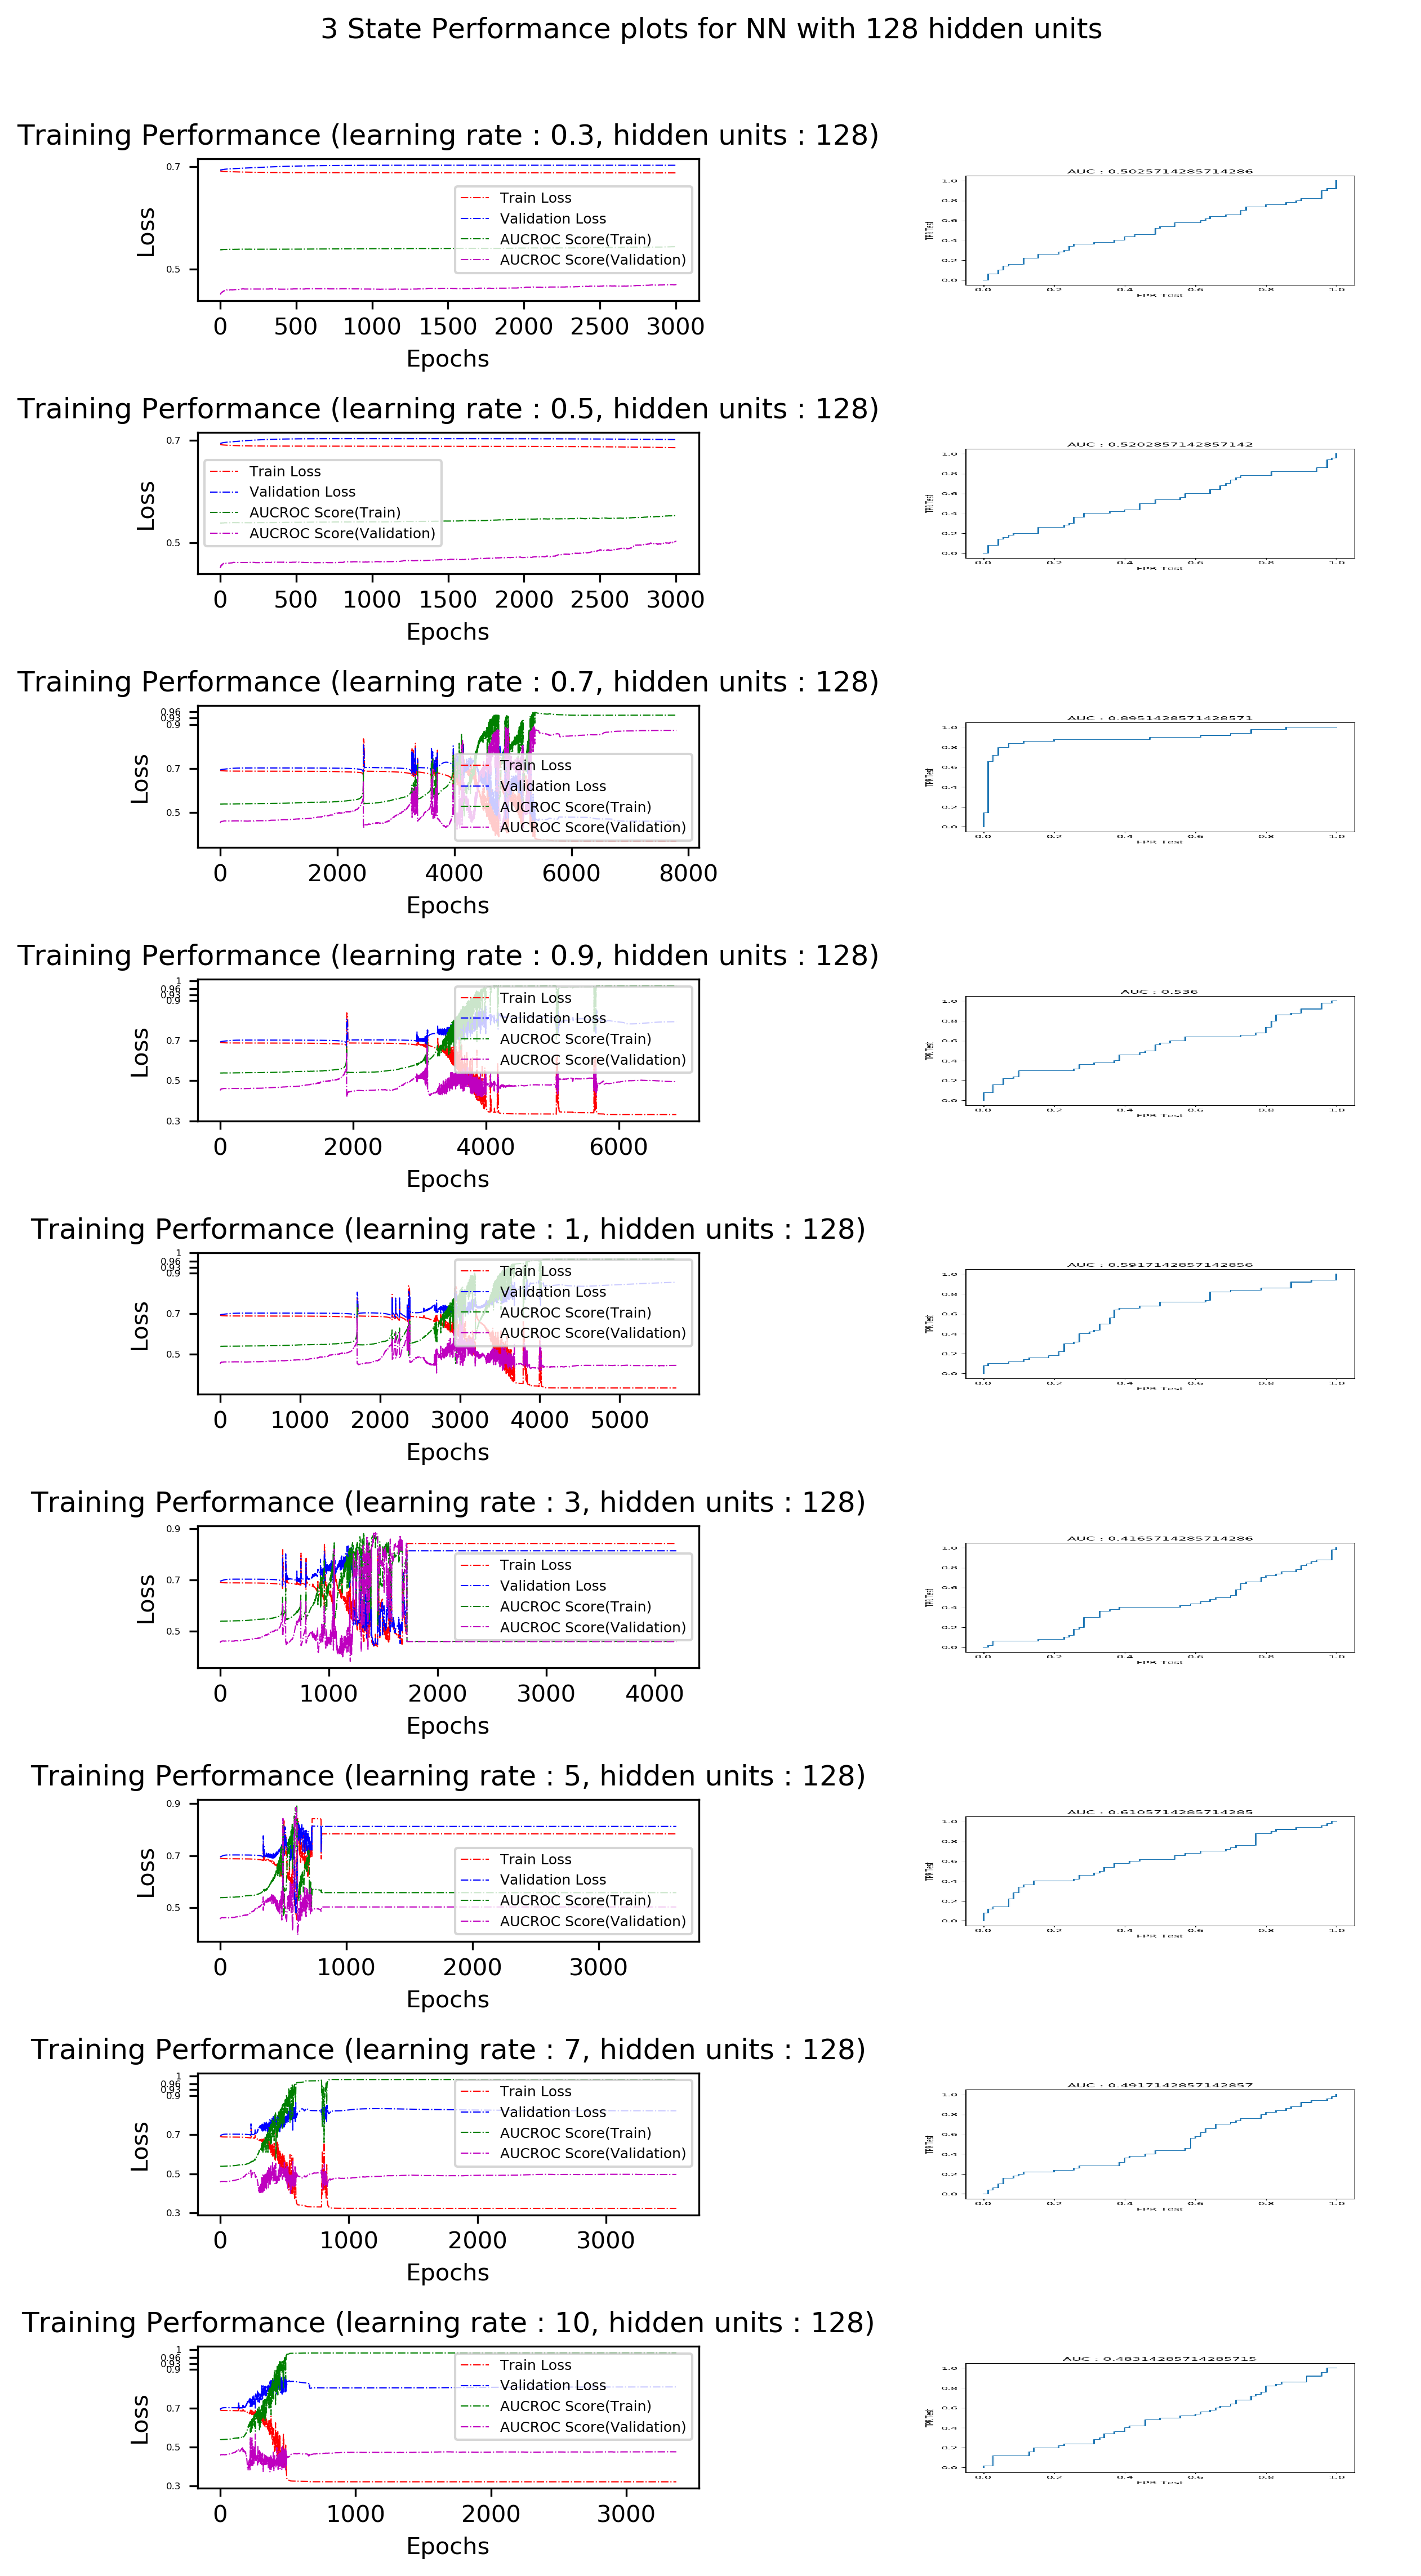

In [5]:
model_folder = '/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn/simulated_data_results'
for arch in ['032', '128']:
    fig, axs = plt.subplots(9,2)
    #     gs1 = gridspec.GridSpec(8,2)",
    # gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
    fig.set_size_inches(8.5, 16)
    fig.dpi = 300
    lw=0.5

    for idx,lr in enumerate([0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10]):
        rnn_model_file = (model_folder + '/3-state-rnn-simulated-data-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_rnn_classifer.pkl')
        aucroc_plots_file = (model_folder + '/3-state-rnn-simulated-data-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_roc_curve.png')
        rnn_model = load(rnn_model_file)
        epochs = rnn_model.history[:,'epoch']
        train_loss = rnn_model.history[:,'train_loss']
        valid_loss = rnn_model.history[:,'valid_loss']
        aucroc_score_train = rnn_model.history[:,'aucroc_score_train']
        aucroc_score_valid = rnn_model.history[:,'aucroc_score_valid']
        img_aucroc = mpimg.imread(aucroc_plots_file)
        # plot train aand validation loss
        axs[idx,0].plot(epochs, train_loss, 'r-.', label = 'Train Loss', linewidth=lw)
        axs[idx,0].plot(epochs, valid_loss, 'b-.', label = 'Validation Loss', linewidth=lw)

        # customize y ticks
        axs[idx,0].set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 0.93, 0.96, 1]) 
        axs[idx,0].set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.9, 0.93, 0.96, 1], fontsize=4)
        axs[idx,0].plot(epochs, aucroc_score_train, 'g-.', label = 'AUCROC Score(Train)', linewidth=lw)
        axs[idx,0].plot(epochs, aucroc_score_valid, 'm-.', label = 'AUCROC Score(Validation)', linewidth=lw)
        axs[idx,0].set_xlabel('Epochs')
        axs[idx,0].set_ylabel('Loss')
        axs[idx,0].legend(fontsize=6)
        axs[idx,0].set_title('Training Performance (learning rate : %s, hidden units : %s)'%(str(lr), arch))
        axs[idx,1].imshow(img_aucroc, aspect='auto')
        axs[idx,1].axis('off')
    fig.suptitle('3 State Performance plots for NN with '+arch+' hidden units')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('3-state-rnn-arch-'+arch+'-performance-plots.png')
    plt.show()

# MIMIC 

## Models that finished running

In [ ]:
model_folder = '/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn/performance_results'
for arch in ['032']:
    fig, axs = plt.subplots(9,2)
    #     gs1 = gridspec.GridSpec(8,2)
    # gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
    fig.set_size_inches(8.5, 16)
    fig.dpi = 300
    lw=0.5

    for idx,lr in enumerate([0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10]):
        rnn_model_file = (model_folder+'/rnn-mimic-mortality-prediction-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_rnn_classifer.pkl')
        aucroc_plots_file = (model_folder+'/rnn-mimic-mortality-prediction-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_roc_curve.png')
        try:
            rnn_model = load(rnn_model_file)
            epochs = rnn_model.history[:,'epoch']
            train_loss = rnn_model.history[:,'train_loss']
            valid_loss = rnn_model.history[:,'valid_loss']
            aucroc_score_train = rnn_model.history[:,'aucroc_score_train']
            aucroc_score_valid = rnn_model.history[:,'aucroc_score_valid']
            img_aucroc = mpimg.imread(aucroc_plots_file)
            # plot train aand validation loss
            axs[idx,0].plot(epochs, train_loss, 'r-.', label = 'Train Loss', linewidth=lw)
            axs[idx,0].plot(epochs, valid_loss, 'b-.', label = 'Validation Loss', linewidth=lw)

            # customize y ticks
            axs[idx,0].set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 0.93, 0.96, 1]) 
            axs[idx,0].set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.9, 0.93, 0.96, 1], fontsize=4)
            axs[idx,0].plot(epochs, aucroc_score_train, 'g-.', label = 'AUCROC Score(Train)', linewidth=lw)
            axs[idx,0].plot(epochs, aucroc_score_valid, 'm-.', label = 'AUCROC Score(Validation)', linewidth=lw)
            axs[idx,0].set_xlabel('Epochs')
            axs[idx,0].set_ylabel('Loss')
            axs[idx,0].legend(fontsize=6)
            axs[idx,0].set_title('Training Performance (learning rate : %s, hidden units : %s)'%(str(lr), arch))
            axs[idx,1].imshow(img_aucroc, aspect='auto')
            axs[idx,1].axis('off')
        except:
            continue
    fig.suptitle('MIMIC Mortality Prediction RNN Performance Plots for NN with '+arch+' hidden units ')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('mimic-rnn-arch-'+arch+'-performance-plots.png')
    plt.show()

## Model currently running

# Adam

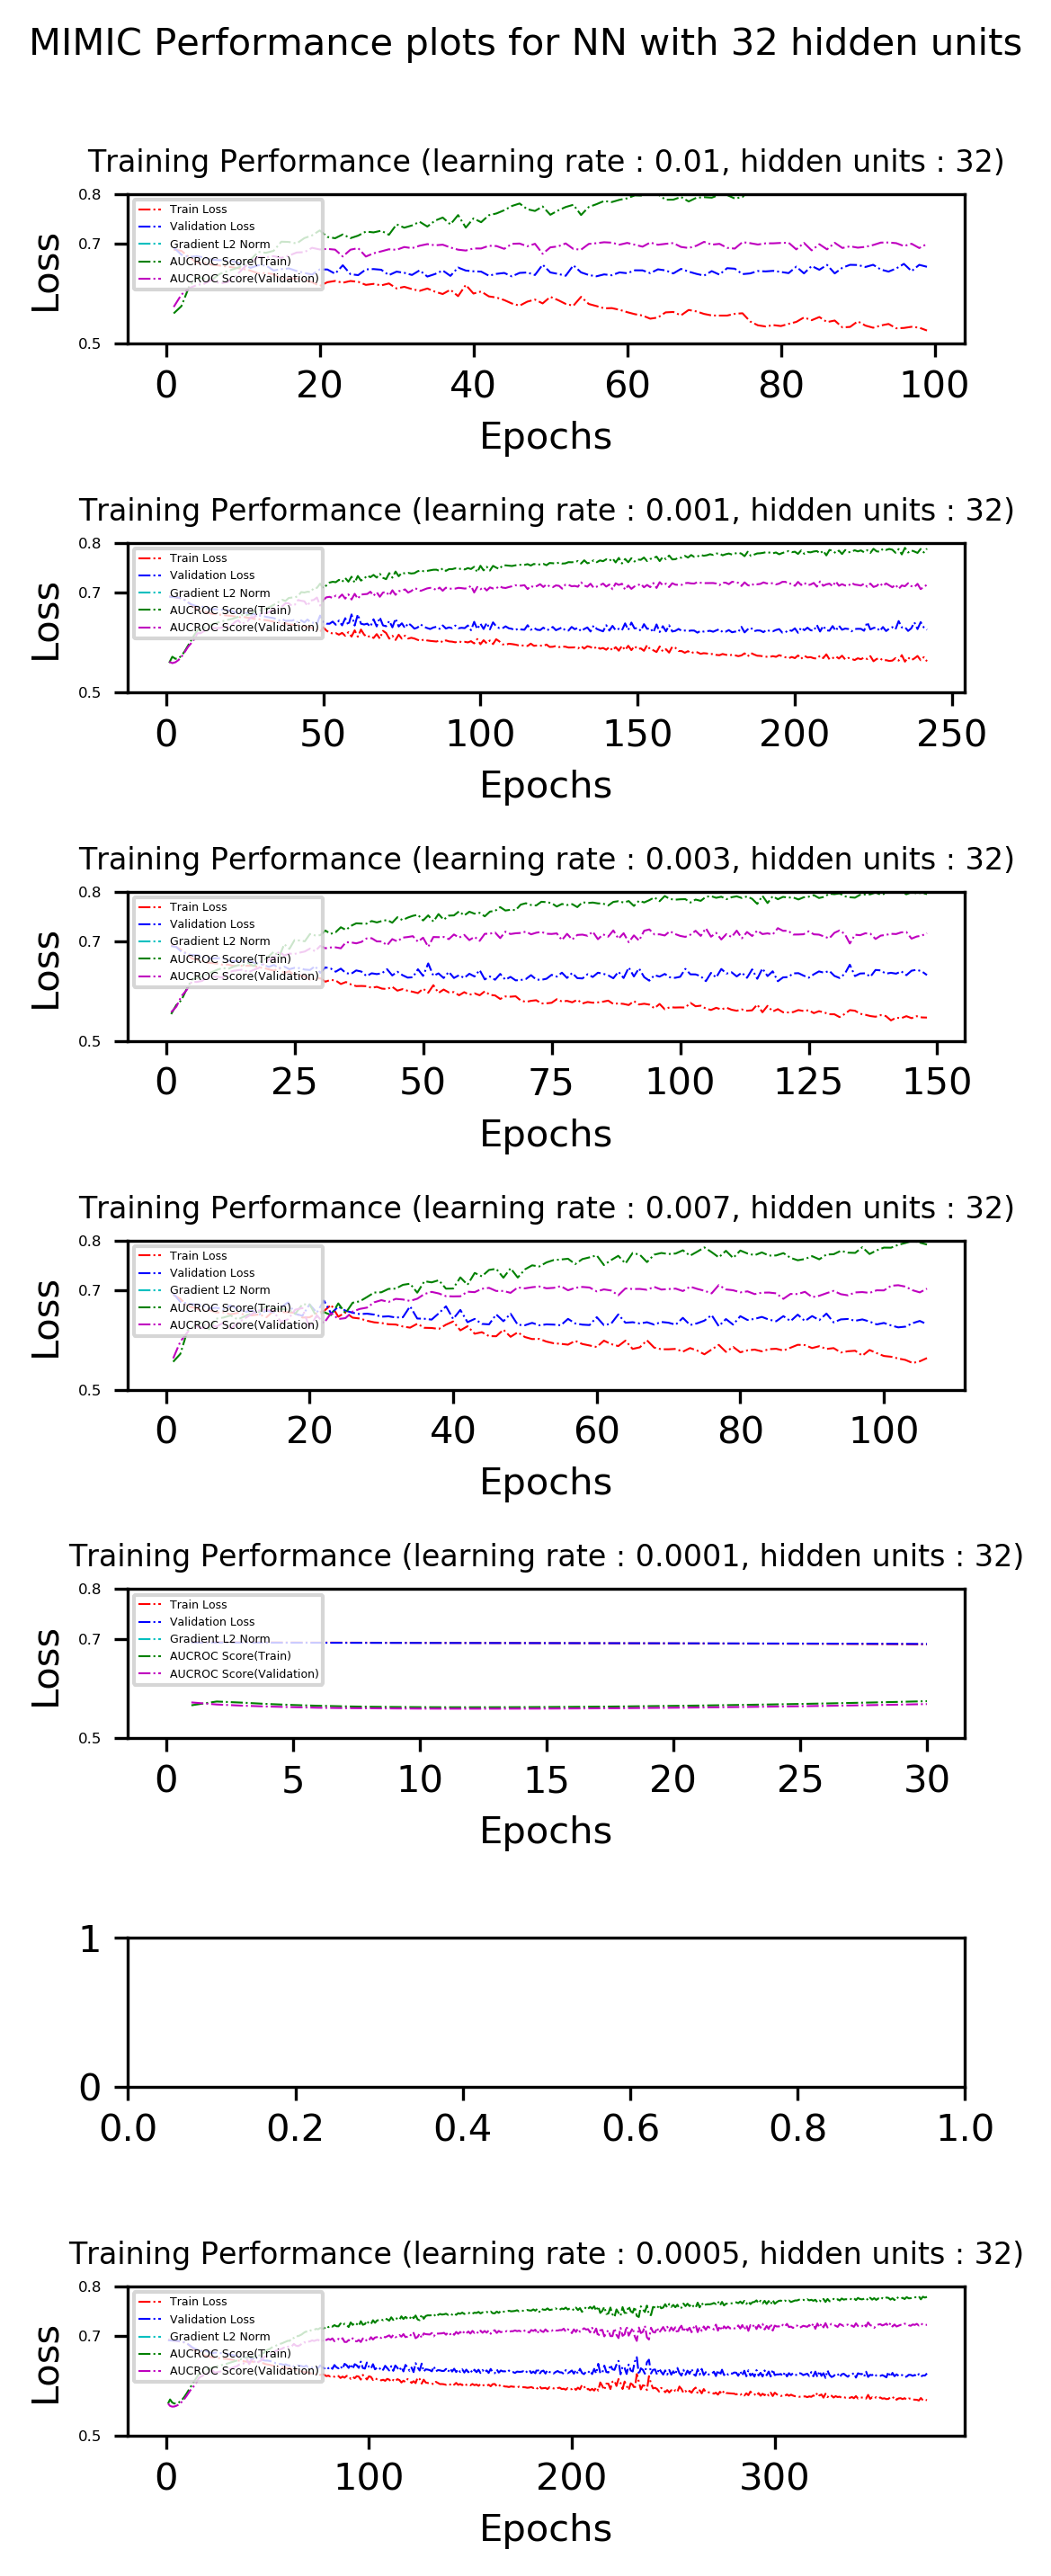

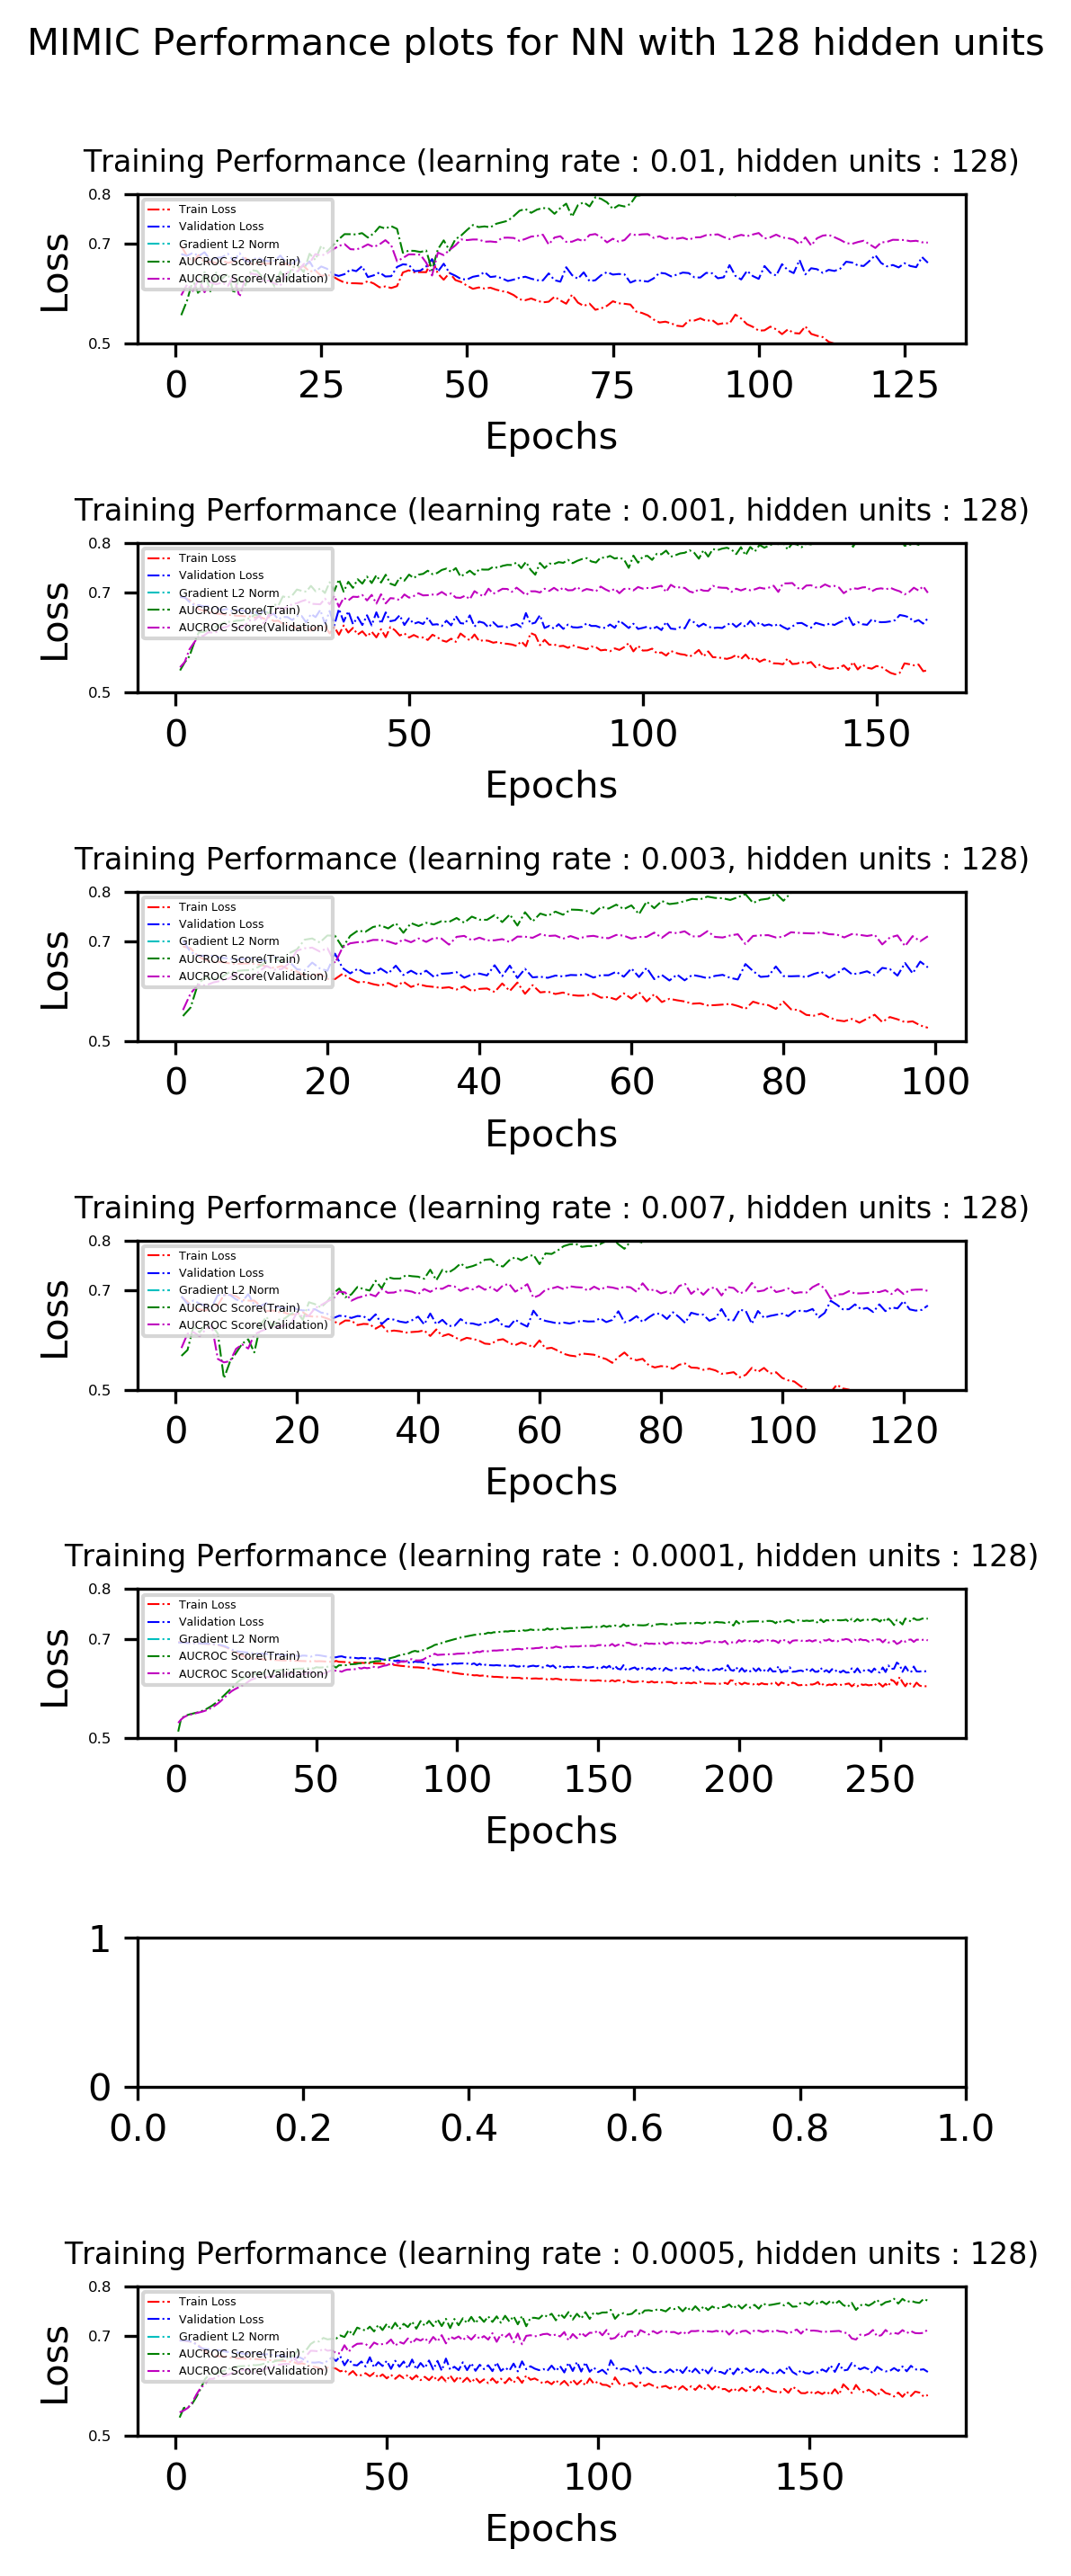

In [3]:
model_folder = '/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn/performance_results'
for arch in ['32','128']:    
    fig, axs = plt.subplots(7,1)
#     gs1 = gridspec.GridSpec(8,2)
    # gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
    fig.set_size_inches(4, 10)
    fig.dpi = 300
    lw=0.5
#     for idx,lr in enumerate([0.1, 0.5, 0.7, 0.9, 1, 3, 5, 7, 9, 10, 60, 80, 100]):
    for idx,lr in enumerate(['0.01', '0.001','0.003','0.007','0.0001','0.0003','0.0005']):
#         rnn_model_file = (model_folder + '/hBrnn-mimic-data-max-epochs=100'+'-lr='+str(lr)+'-arch='+arch+'_running_rnn_classifer_history.json')
#         rnn_gradient_norm_file = (model_folder + '/hBrnn-mimic-data-max-epochs=100'+'-lr='+str(lr)+'-arch='+arch+'_running_rnn_classifer_gradient_norm_history.csv')
        rnn_model_file = (model_folder + '/rnn-mimic-mortality-prediction-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_running_rnn_classifer_history.json')
        rnn_gradient_norm_file = (model_folder + '/rnn-mimic-mortality-prediction-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'_running_rnn_classifer_gradient_norm_history.csv')
        try:
            with open(rnn_model_file, 'r') as f:
                rnn_dict = json.load(f)
            epochs=[i['epoch'] for i in rnn_dict]
            train_loss = [i['train_loss'] for i in rnn_dict]
            valid_loss = [i['valid_loss'] for i in rnn_dict]
            aucroc_score_train = [i['aucroc_score_train'] for i in rnn_dict]
            aucroc_score_valid = [i['aucroc_score_valid'] for i in rnn_dict]

            # get the gradient norms
            grad_norm_df = pd.read_csv(rnn_gradient_norm_file)
            grad_norm_df = grad_norm_df.groupby('epoch', as_index=False).mean()[['gradient_norm']]
            gradient_L2_norm = grad_norm_df['gradient_norm']

            # plot train aand validation loss
            axs[idx].plot(epochs, train_loss, 'r-.', label = 'Train Loss', linewidth=lw)
            axs[idx].plot(epochs, valid_loss, 'b-.', label = 'Validation Loss', linewidth=lw)
            axs[idx].plot(range(len(gradient_L2_norm)), gradient_L2_norm, 'c-.', label = 'Gradient L2 Norm', linewidth=lw)
            # customize y ticks
            axs[idx].set_yticks([0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1]) 
            axs[idx].set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1], fontsize=4)

            axs[idx].plot(epochs, aucroc_score_train, 'g-.', label = 'AUCROC Score(Train)', linewidth=lw)
            axs[idx].plot(epochs, aucroc_score_valid, 'm-.', label = 'AUCROC Score(Validation)', linewidth=lw)
            axs[idx].set_xlabel('Epochs')
            axs[idx].set_ylabel('Loss')
            axs[idx].legend(fontsize=3, loc='upper left')
            axs[idx].set_ylim([.5,.8])
            axs[idx].set_title('Training Performance (learning rate : %s, hidden units : %s)'%(str(lr), arch), fontsize=8)
        except :
            continue
    fig.suptitle('MIMIC Performance plots for NN with '+arch+' hidden units', fontsize=10)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#     fig.savefig('mimic-rnn-arch-'+arch+'-performance-plots.png')
    plt.show()

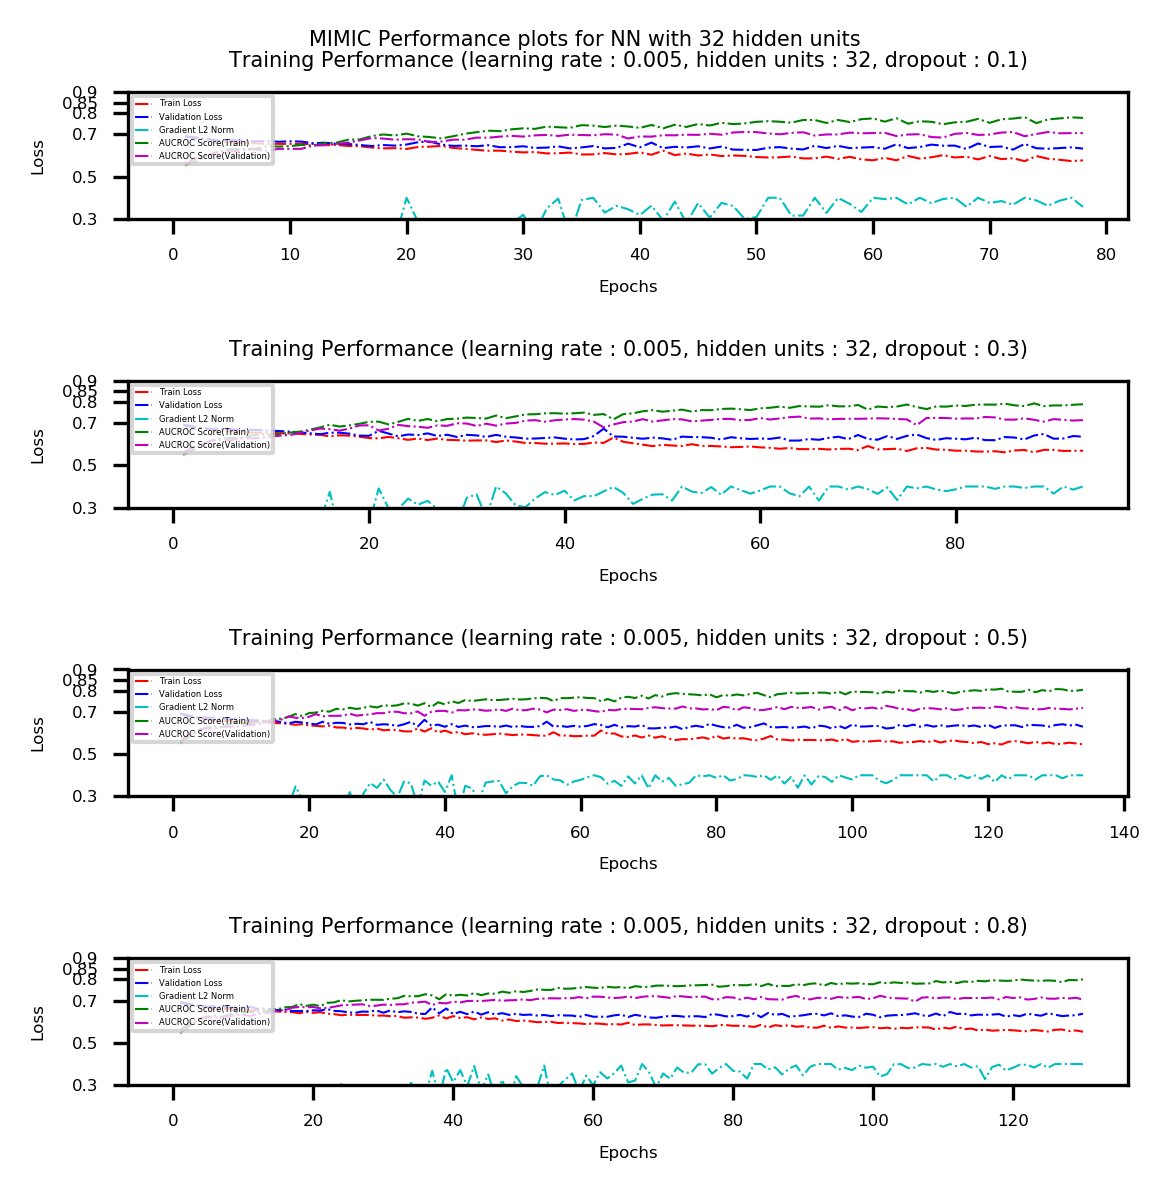

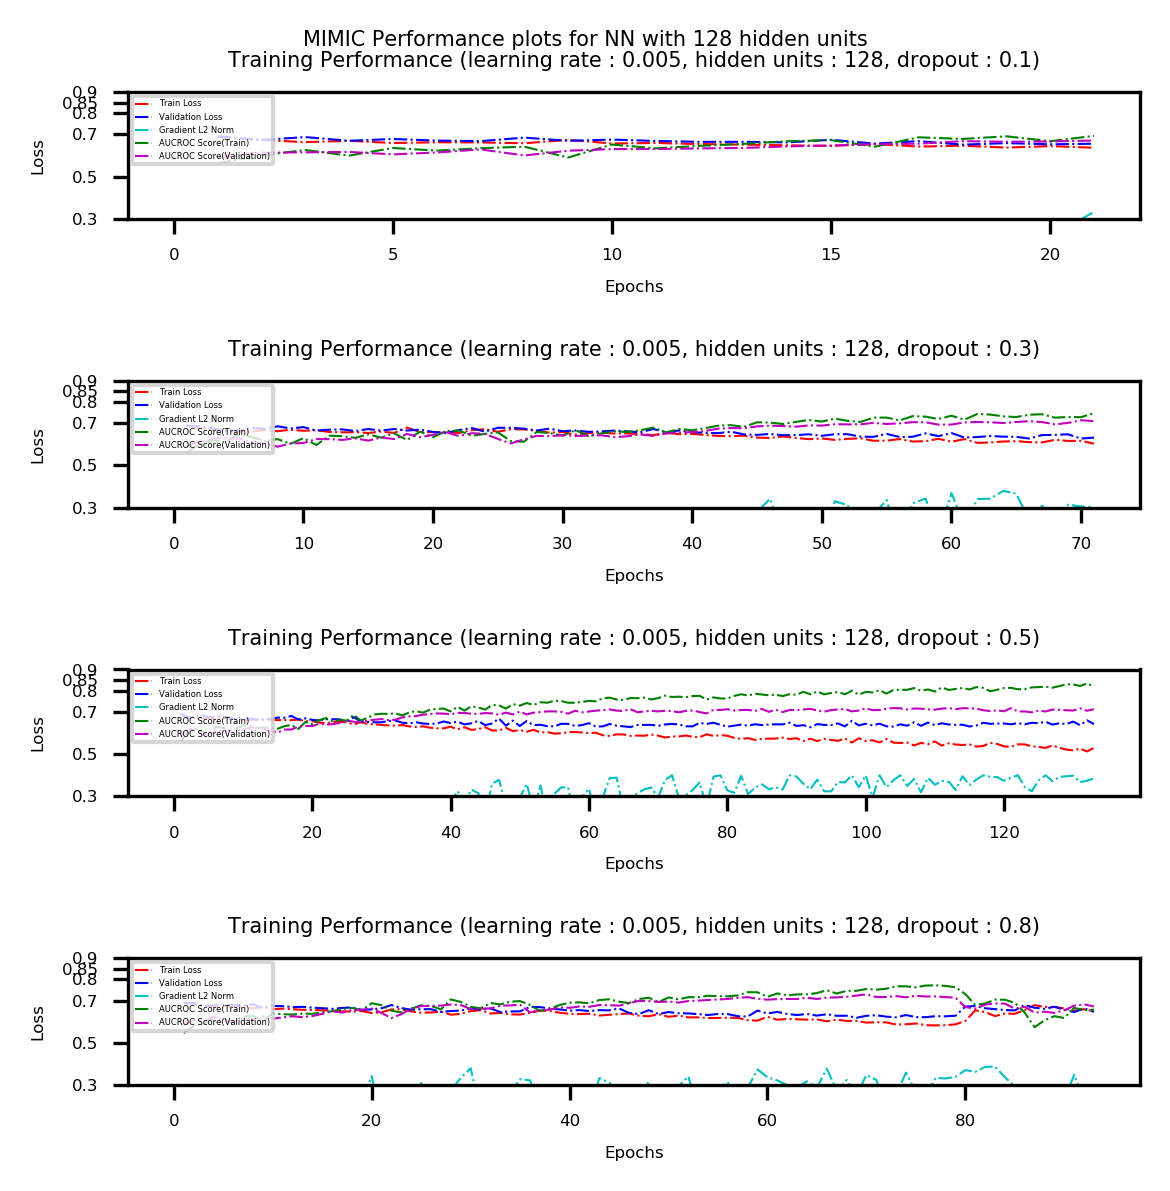

In [24]:
model_folder = '/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn/performance_results'
for arch in ['32','128']:    
    fig, axs = plt.subplots(4,1)
#     gs1 = gridspec.GridSpec(8,2)
    # gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
    fig.set_size_inches(4, 4)
    fig.dpi = 300
    lw=0.5
    for idx_lr,lr in enumerate(['0.005']):
        for idx, dropout in enumerate(['0.1', '0.3', '0.5', '0.8']):
            rnn_model_file = (model_folder + '/rnn-mimic-mortality-prediction-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'-dropout='+dropout+'_running_rnn_classifer_history.json')
            rnn_gradient_norm_file = (model_folder + '/rnn-mimic-mortality-prediction-max-epochs=100000-arch='+arch+'-lr='+str(lr)+'-dropout='+dropout+'_running_rnn_classifer_gradient_norm_history.csv')
#             try:
            with open(rnn_model_file, 'r') as f:
                rnn_dict = json.load(f)
            epochs=[i['epoch'] for i in rnn_dict]
            train_loss = [i['train_loss'] for i in rnn_dict]
            valid_loss = [i['valid_loss'] for i in rnn_dict]
            aucroc_score_train = [i['aucroc_score_train'] for i in rnn_dict]
            aucroc_score_valid = [i['aucroc_score_valid'] for i in rnn_dict]

            # get the gradient norms
            grad_norm_df = pd.read_csv(rnn_gradient_norm_file)
            grad_norm_df = grad_norm_df.groupby('epoch', as_index=False).mean()[['gradient_norm']]
            gradient_L2_norm = grad_norm_df['gradient_norm']

            # plot train aand validation loss
            axs[idx].plot(epochs, train_loss, 'r-.', label = 'Train Loss', linewidth=lw)
            axs[idx].plot(epochs, valid_loss, 'b-.', label = 'Validation Loss', linewidth=lw)
            axs[idx].plot(range(len(gradient_L2_norm)), gradient_L2_norm, 'c-.', label = 'Gradient L2 Norm', linewidth=lw)
            # customize y ticks
            axs[idx].set_yticks([0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1]) 
            axs[idx].set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1], fontsize=4)

            axs[idx].plot(epochs, aucroc_score_train, 'g-.', label = 'AUCROC Score(Train)', linewidth=lw)
            axs[idx].plot(epochs, aucroc_score_valid, 'm-.', label = 'AUCROC Score(Validation)', linewidth=lw)
            axs[idx].set_xlabel('Epochs', fontsize=4)
            axs[idx].set_ylabel('Loss', fontsize=4)
            axs[idx].tick_params(axis='x', labelsize=4)
            axs[idx].legend(fontsize=2, loc='upper left')
            axs[idx].set_ylim([.3,.9])
            axs[idx].set_title('Training Performance (learning rate : %s, hidden units : %s, dropout : %s)'%(str(lr), arch, dropout), fontsize=5)
#         except :
#             continue
    fig.suptitle('MIMIC Performance plots for NN with '+arch+' hidden units', fontsize=5)
    fig.tight_layout()
    fig.savefig('mimic-rnn-arch-'+arch+'-performance-plots.png')
    plt.show()

In [17]:
epochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69]

# Plotting the time series data for a subject

In [9]:
# model_folder = '/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn/performance_results'
# rnn_gradient_norm_model_file = (model_folder + '/rnn-mimic-mortality-prediction-max-epochs=100000-arch=32-lr=10_running_rnn_classifer_gradient_norm_history.csv')
# grad_norm_df = pd.read_csv(rnn_gradient_norm_model_file)
# a= grad_norm_df.groupby('epoch').mean()[['gradient_norm']]
# a
# len(epochs)
TS_METADATA_PATH="/cluster/tufts/hugheslab/datasets/mimic-iii-v1.4/v20181213/tidy/mimic3benchmarks_inhospital_mortality/20190406/metadata_per_seq.csv"
TEMP_DATA_PATH="/cluster/tufts/hugheslab/prath01/projects/mimic3_benchmarks/code_results/rnn"
train_vitals = TidySequentialDataCSVLoader(
    per_tstep_csv_path=TEMP_DATA_PATH+'/ts_test_train/train.csv',
    per_seq_csv_path=TS_METADATA_PATH,
    idx_col_names=['subject_id', 'episode_id'],
    x_col_names='__all__',
    y_col_name='inhospital_mortality',
    y_label_type='')

test_vitals = TidySequentialDataCSVLoader(
    per_tstep_csv_path=TEMP_DATA_PATH+'/ts_test_train/test.csv',
    per_seq_csv_path=TS_METADATA_PATH,
    idx_col_names=['subject_id', 'episode_id'],
    x_col_names='__all__',
    y_col_name='inhospital_mortality',
    y_label_type='')

X_train_with_time_appended, y_train = train_vitals.get_batch_data(batch_id=0)
X_train = X_train_with_time_appended[:,:,1:]# removing hours column
X_test_with_time_appended, y_test = test_vitals.get_batch_data(batch_id=0)
X_test = X_test_with_time_appended[:,:,1:]# removing hours column

Index(['hours', 'weight', 'heart_rate', 'temperature', 'mean_blood_pressure',
       'systolic_blood_pressure', 'diastolic_blood_pressure',
       'respiratory_rate', 'fraction_inspired_oxygen', 'oxygen_saturation',
       'capillary_refill_rate', 'ph', 'glucose'],
      dtype='object')
Index(['hours', 'weight', 'heart_rate', 'temperature', 'mean_blood_pressure',
       'systolic_blood_pressure', 'diastolic_blood_pressure',
       'respiratory_rate', 'fraction_inspired_oxygen', 'oxygen_saturation',
       'capillary_refill_rate', 'ph', 'glucose'],
      dtype='object')


In [59]:
# a,b,c = np.where(X_train == X_train.max())
# print(a)
# print(b)
# print(c)

# X_train[14707, :, 0]
# per_tstep_csv_path=TEMP_DATA_PATH+'/ts_test_train/train.csv'
# per_tstep_csv_df = pd.read_csv(per_tstep_csv_path)

# X_train = np.asarray(per_tstep_csv_df)


# a,b = np.where(X_train == np.nanmax(X_train))
# print(a)
# print(b)

# per_tstep_csv_df.iloc[667839,:]
# per_tstep_csv_df.median()

# print(np.nanmax(X_test,axis=1))
# print(X_test.max(axis=1))
X_test.max()

1177788.5

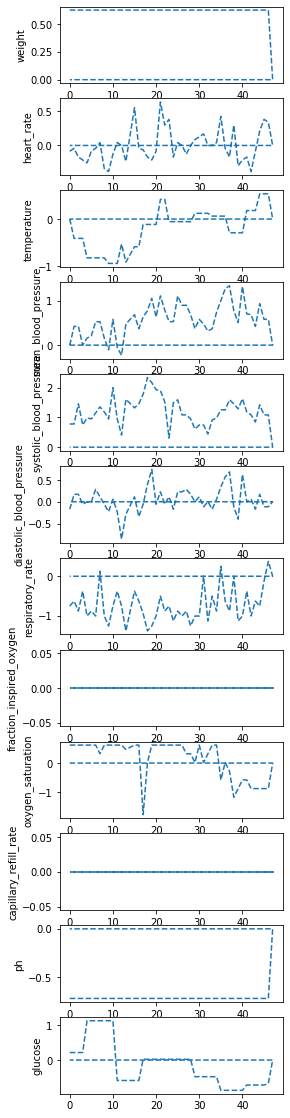

In [21]:
t=X_train_with_time_appended[0,:,0]

features = ['weight', 'heart_rate', 'temperature', 'mean_blood_pressure',
            'systolic_blood_pressure', 'diastolic_blood_pressure',
            'respiratory_rate', 'fraction_inspired_oxygen', 'oxygen_saturation',
            'capillary_refill_rate', 'ph', 'glucose']
fig, axs = plt.subplots(12,1)
fig.set_size_inches(4, 20)
for i in range(X_train.shape[-1]):
    axs[i].plot(t, X_train[1,:,i], '--')
    axs[i].set_ylabel(features[i])
plt.show()

In [ ]:
seq_lens=list()
for i in range(X_train.shape[0]):
    a=torch.all(torch.from_numpy(X_train[i,:,:]) == 0, dim=-1)
    seq_lens.append(np.searchsorted(a,1))
seq_lens

# Weight decay l2 normalization pytorch example

In [35]:
np.random.seed(123)
np.set_printoptions(8, suppress=True)

x_numpy = np.random.random((3000, 12)).astype(np.double)
w_numpy = np.random.random((12, 128)).astype(np.double)
x_torch = torch.tensor(x_numpy, requires_grad=True)
w_torch = torch.tensor(w_numpy, requires_grad=True)

#######################################################

print('Original weights', w_torch)

lr = 10
sgd = torch.optim.SGD([w_torch], lr=lr, weight_decay=0)

y_torch = torch.matmul(x_torch, w_torch)
loss = y_torch.sum()

sgd.zero_grad()
loss.backward()
sgd.step()

w_grad = w_torch.grad.data.numpy()
print('0 weight decay', w_torch)
print('weights l2 norm', w_torch.norm(2).item())


#######################################################

w_torch = torch.tensor(w_numpy, requires_grad=True)

print('Reset Original weights', w_torch)

sgd = torch.optim.SGD([w_torch], lr=lr, weight_decay=1)

y_torch = torch.matmul(x_torch, w_torch)
loss = y_torch.sum()

sgd.zero_grad()
loss.backward()
sgd.step()

w_grad = w_torch.grad.data.numpy()
print('1 weight decay', w_torch)
print('weights l2 norm', w_torch.norm(2).item())



Original weights tensor([[0.0423, 0.6980, 0.8297,  ..., 0.5254, 0.8503, 0.4493],
        [0.1619, 0.0355, 0.0081,  ..., 0.5446, 0.5544, 0.1153],
        [0.1530, 0.6245, 0.8640,  ..., 0.3195, 0.9440, 0.7324],
        ...,
        [0.5953, 0.5488, 0.9862,  ..., 0.3205, 0.4733, 0.4538],
        [0.3053, 0.0414, 0.5869,  ..., 0.3403, 0.0894, 0.8580],
        [0.1312, 0.8756, 0.1146,  ..., 0.6377, 0.3679, 0.7740]],
       dtype=torch.float64, requires_grad=True)
0 weight decay tensor([[-14964.1144, -14963.4587, -14963.3270,  ..., -14963.6313,
         -14963.3064, -14963.7074],
        [-14814.1677, -14814.2942, -14814.3215,  ..., -14813.7850,
         -14813.7752, -14814.2144],
        [-14975.8138, -14975.3424, -14975.1028,  ..., -14975.6473,
         -14975.0228, -14975.2345],
        ...,
        [-15078.2657, -15078.3122, -15077.8748,  ..., -15078.5405,
         -15078.3877, -15078.4072],
        [-15102.9681, -15103.2321, -15102.6865,  ..., -15102.9331,
         -15103.1840, -15102.4